# Regression Models

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn') 

import seaborn as sns

In [2]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
diamonds.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In our exploratory data analysis (EDA), we’ve seen some surprising relationships between the quality of diamonds and their price: low quality diamonds (poor cuts, bad colours, and inferior clarity) have higher prices.

<AxesSubplot:xlabel='cut', ylabel='price'>

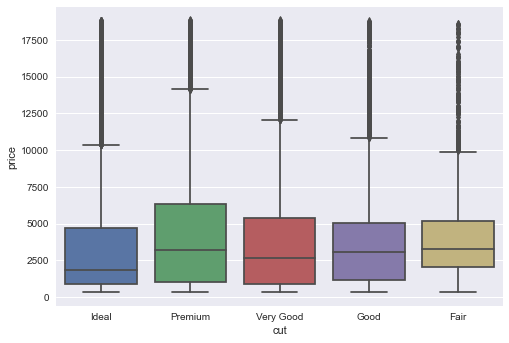

In [5]:
# Fair cuts have highter price? 
sns.boxplot(data=diamonds, x='cut', y='price')

<AxesSubplot:xlabel='color', ylabel='price'>

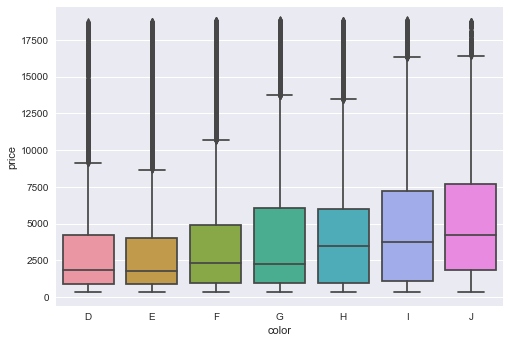

In [6]:
# The worst diamond color is J (slightly yellow)
sns.boxplot(data=diamonds, x='color', y='price')

<AxesSubplot:xlabel='clarity', ylabel='price'>

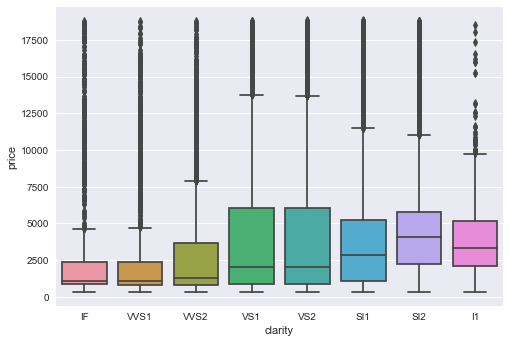

In [7]:
# The worst clarity is I1 (inclusions visible to the naked eye).
sns.boxplot(data=diamonds, x='clarity', y='price')

Do these charts mean lower quality diamonds have higher prices? If that's the case, why do people pay higher prices for lower quality? 

Do not forget there is an important confounding variable: the weight (carat) of the diamond. The weight of the diamond is the single most important factor for determining the price of the diamond, and lower quality diamonds tend to be larger.

<AxesSubplot:xlabel='carat', ylabel='price'>

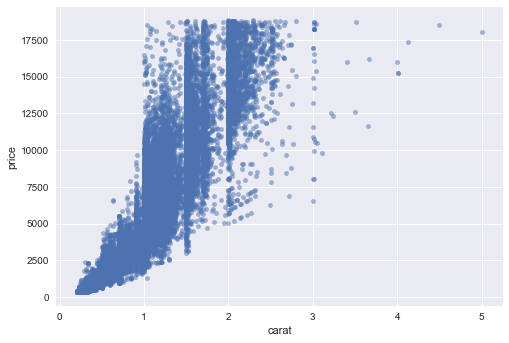

In [8]:
diamonds.plot(x='carat', y='price', kind='scatter', alpha=0.5)

## Build a Simple Regression Model for Diamond Price

We build a simple regression model to predict diamond price by carat. 

In [9]:
# Use sklearn for linear regression
from sklearn.linear_model import LinearRegression

In [10]:
diamonds_y = diamonds['price']
diamonds_y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [11]:
# X as a dataframe (numpy array)
diamonds_X = diamonds[['carat']]
diamonds_X

,carat
0,0.23
1,0.21
2,0.23
3,0.29
4,0.31
...,...
53935,0.72
53936,0.72
53937,0.70
53938,0.86


In [12]:
lm1 = LinearRegression()
lm1.fit(diamonds_X, diamonds_y)

LinearRegression()

In [13]:
print(lm1.intercept_, lm1.coef_)

-2256.3605800454293 [7756.42561797]


In [14]:
# R^2 of the model
lm1.score(diamonds_X, diamonds_y)

0.8493305264354858

In [15]:
# Calculate the predicted price
diamonds_y_pred = lm1.predict(diamonds_X)

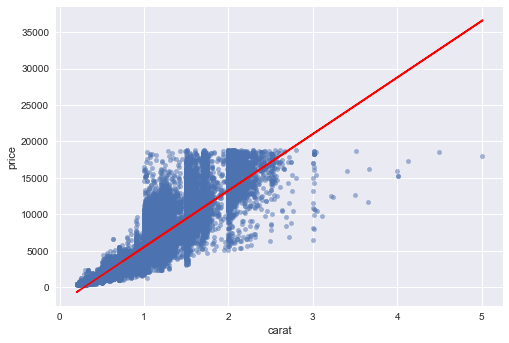

In [16]:
diamonds.plot(x='carat', y='price', kind='scatter', alpha=0.5)
plt.plot(diamonds['carat'], diamonds_y_pred, color='red')

In [17]:
# RMSE: This indidcates how off the predicted values are from the actual values. 
from sklearn.metrics import mean_squared_error
lm1_rmse = mean_squared_error(diamonds_y, diamonds_y_pred, squared=False)
lm1_rmse

1548.5331930613174

## Improving the model

Next, let's make a few tweaks to our model: 
- Remove the outliers (big diamonds)
- Include other variables
- Examine non-linearity 

### Remove outliers 

In [18]:
# How many diamonds are larger than 2.5 carats (99.7% of the data)
bigrock = diamonds.carat>2.5
bigrock.value_counts(normalize=True)

False    0.997664
True     0.002336
Name: carat, dtype: float64

In [19]:
# Focus on diamonds smaller than 2.5 carats. 
df = diamonds[diamonds.carat<=2.5]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53814 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53814 non-null  float64 
 1   cut      53814 non-null  category
 2   color    53814 non-null  category
 3   clarity  53814 non-null  category
 4   depth    53814 non-null  float64 
 5   table    53814 non-null  float64 
 6   price    53814 non-null  int64   
 7   x        53814 non-null  float64 
 8   y        53814 non-null  float64 
 9   z        53814 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


In [20]:
df = df.reset_index().drop(columns=['index'])
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53809,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53810,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53811,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53812,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [21]:
df_X = df[['carat']]
df_y = df['price']

In [22]:
# Build a new lineary model using data without the outliers 
lm2 = LinearRegression()
lm2.fit(df_X, df_y)

LinearRegression()

In [23]:
print(lm2.intercept_, lm2.coef_)

-2330.655504678857 [7862.1680473]


In [24]:
# R^2 of the model
lm2.score(df_X, df_y)

0.8519722572415094

In [25]:
# Calculate the predicted price using the new model 
y_pred = lm2.predict(df_X)

In [26]:
# Estimate the RMSE
mean_squared_error(df_y, y_pred, squared=False)

1520.6980068535083

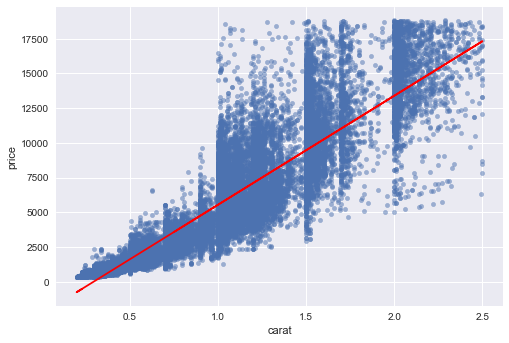

In [27]:
df.plot(x='carat', y='price', kind='scatter', alpha=0.5)
plt.plot(df['carat'], y_pred, color='red')

### Adding another variable 'cut'

In [28]:
# Let's only keep carat and cut as independent variables. 
# You can include more variables (e.g., color, clarity) later if you want. 
df_X = df[['carat','cut']]
df_y = df['price']

In [29]:
df_X.head()

,carat,cut
0,0.23,Ideal
1,0.21,Premium
2,0.23,Good
3,0.29,Premium
4,0.31,Good


In [30]:
# 'cut' is a categorical variable with five possible values 
df_X.cut.value_counts()

Ideal        21528
Premium      13745
Very Good    12063
Good          4889
Fair          1589
Name: cut, dtype: int64

In [31]:
# You could use sklearn's encoder such as OneHotEncoder to encode this variable. 
# Alternatively, use get_dummies() to converting 'cut' to dummy variables, i.e., one-hot encoding 
df_X_onehot = pd.get_dummies(df_X)
df_X_onehot.head()

,carat,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair
0,0.23,1,0,0,0,0
1,0.21,0,1,0,0,0
2,0.23,0,0,0,1,0
3,0.29,0,1,0,0,0
4,0.31,0,0,0,1,0


In [32]:
# To differentiate the five levels of cut, we only need to keep four dummy variables
df_X1 = df_X_onehot[['carat','cut_Ideal','cut_Premium','cut_Very Good','cut_Good']]

In [33]:
# Build a new 
lm_onhot = LinearRegression()
lm_onhot.fit(df_X1, df_y)

LinearRegression()

In [34]:
# Print the intercept and coefficients
print(lm_onhot.intercept_, lm_onhot.coef_)

-3895.0408642002085 [7974.56625425 1751.30245509 1379.87435057 1452.57396734 1063.00747392]


How to interpret the coefficients? 

carat: 7974.56625425
Accounting for the same level of cut. For every one carrot increase the price will go up by appx $8000

cut_Ideal: 1751.30245509
cut_Premium: 1379.87435057
cut_Very Good: 1452.57396734
cut_Good: 1063.00747392

In [35]:
# R^2 
lm_onhot.score(df_X1, df_y)

0.8590074959441552

In [36]:
# RMSE 
y_pred = lm_onhot.predict(df_X1)

mean_squared_error(df_y, y_pred, squared=False)

1484.121409859559

### Encode 'cut' with an ordinal encoder
With the knowledge that the five values of cut, ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], indicate the quality from low to high, we could also encode this variable using an ordinal encoder (0, 1, 2, 3, 4). 

In [37]:
# select the variable to be encoded
cat_df = df[['cut']]
cat_df.head()

,cut
0,Ideal
1,Premium
2,Good
3,Premium
4,Good


In [38]:
# OrdinalEncoder 
from sklearn.preprocessing import OrdinalEncoder
# You can specify the order of values for endocing 
ord_encoder = OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']])
cat_ord_encoded = ord_encoder.fit_transform(cat_df)
ord_encoder.categories_

[array(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'], dtype=object)]

In [39]:
cat_ord_encoded

array([[4.],
       [3.],
       [1.],
       ...,
       [2.],
       [3.],
       [4.]])

In [40]:
# convert cat_ord_encoded into dataframe
cat_df_ord_encoded = pd.DataFrame(cat_ord_encoded, columns=cat_df.columns) 
cat_df_ord_encoded

,cut
0,4.0
1,3.0
2,1.0
3,3.0
4,1.0
...,...
53809,4.0
53810,1.0
53811,2.0
53812,3.0


In [41]:
cat_df.cut.value_counts()

Ideal        21528
Premium      13745
Very Good    12063
Good          4889
Fair          1589
Name: cut, dtype: int64

In [42]:
cat_df_ord_encoded.cut.value_counts()

4.0    21528
3.0    13745
2.0    12063
1.0     4889
0.0     1589
Name: cut, dtype: int64

In [43]:
df_X_ord = pd.concat([df_X[['carat']], cat_df_ord_encoded], axis=1)
df_X_ord

,carat,cut
0,0.23,4.0
1,0.21,3.0
2,0.23,1.0
3,0.29,3.0
4,0.31,1.0
...,...,...
53809,0.72,4.0
53810,0.72,1.0
53811,0.70,2.0
53812,0.86,3.0


In [44]:
# Build a new model
lm_ord = LinearRegression()
lm_ord.fit(df_X_ord, df_y)

LinearRegression()

In [45]:
# Print the intercept and coefficients
print(lm_ord.intercept_, lm_ord.coef_)

-3139.8677974900484 [7943.41866224  256.31917809]


How to interpret the coefficients? 


carat: 7943.41866224
cut: 256.31917809

In [46]:
# R^2
lm_ord.score(df_X_ord, df_y)

0.8571147927378382

In [47]:
# RMSE
df_y_pred = lm_ord.predict(df_X_ord)

mean_squared_error(df_y, df_y_pred, squared=False)

1494.0497284318856

### Non-linearity

The relationship between carat and price seems to be non-linear. 

<AxesSubplot:xlabel='carat', ylabel='price'>

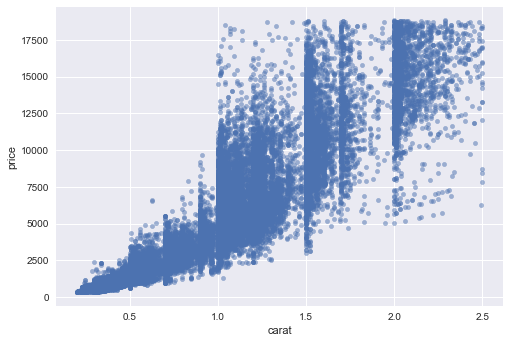

In [48]:
df.plot(x='carat', y='price', kind='scatter', alpha=0.5)

In [49]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)

df['log_price'] = transformer.transform(df.price)
df['log_price']

0        5.789960
1        5.789960
2        5.793014
3        5.814131
4        5.817111
           ...   
53809    7.922261
53810    7.922261
53811    7.922261
53812    7.922261
53813    7.922261
Name: log_price, Length: 53814, dtype: float64

In [50]:
df['log_carat'] = transformer.transform(df.carat)

<AxesSubplot:xlabel='log_carat', ylabel='log_price'>

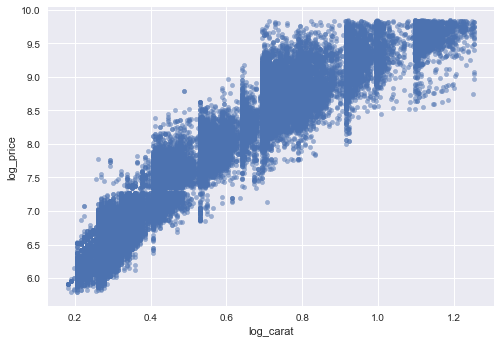

In [51]:
df.plot(x='log_carat', y='log_price', kind='scatter', alpha=0.5)

In [52]:
df_X_log = df[['log_carat']]
df_X_log

,log_carat
0,0.207014
1,0.190620
2,0.207014
3,0.254642
4,0.270027
...,...
53809,0.542324
53810,0.542324
53811,0.530628
53812,0.620576


In [53]:
df_y_log = df['log_price']
df_y_log

0        5.789960
1        5.789960
2        5.793014
3        5.814131
4        5.817111
           ...   
53809    7.922261
53810    7.922261
53811    7.922261
53812    7.922261
53813    7.922261
Name: log_price, Length: 53814, dtype: float64

In [54]:
lm_log = LinearRegression()
lm_log.fit(df_X_log, df_y_log)

LinearRegression()

In [55]:
# Print the intercept and coefficients
print(lm_log.intercept_, lm_log.coef_)

5.575160287759122 [3.98906194]


How to interpret the coefficients? 

If the log carrot is increase by 1 than our log price will increase by 5.58

In [56]:
# R^2
lm_log.score(df_X_log, df_y_log)

0.9125661358395424

In [57]:
# Make predictions using the new model 
# using log_carat to predit log_price
log_y_pred = lm_log.predict(df_X_log)
# You must convert log price back to price 
y_pred = np.expm1(log_y_pred)

In [58]:
# RMSE 
mean_squared_error(df_y, y_pred, squared=False)

2480.1502949274704

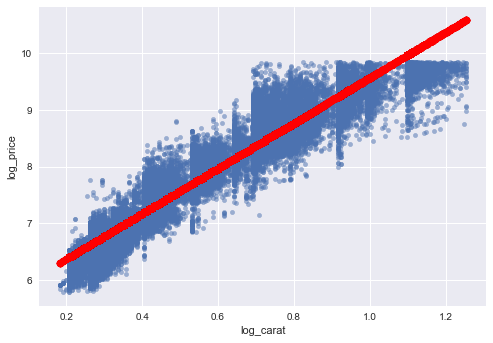

In [59]:
df.plot(x='log_carat', y='log_price', kind='scatter', alpha=0.5)
plt.scatter(df['log_carat'], log_y_pred, color='red')

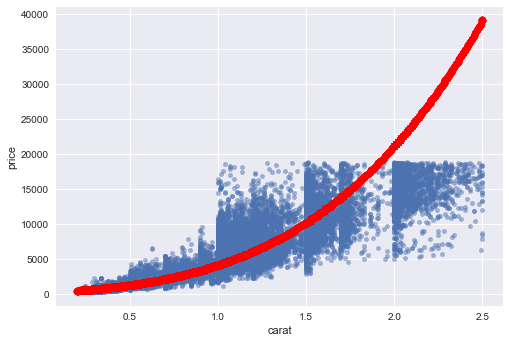

In [60]:
df.plot(x='carat', y='price', kind='scatter', alpha=0.5)
plt.scatter(df['carat'], y_pred, color='red')

# Exercise

Build an other regression model (e.g., including other variables such as color and clarity, adding categorical variable(s) to the log-transformed model). Test its performance. 

In [62]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [63]:
df_X = df[['carat','cut','clarity']]
df_y = df['price']

In [64]:
df_X_onehot = pd.get_dummies(df_X)
df_X_onehot.head()

,carat,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0.21,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.23,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0.29,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0.31,0,0,0,1,0,0,0,0,0,0,0,1,0


In [65]:
df_X1 = (
    df_X_onehot[['carat','cut_Ideal','cut_Premium','cut_Very Good','cut_Good','cut_Fair','clarity_IF'
                ,'clarity_VVS1','clarity_VVS2','clarity_VS1','clarity_VS2','clarity_SI1','clarity_SI2']]
)

In [66]:
lm_onhot = LinearRegression()
lm_onhot.fit(df_X1, df_y)

LinearRegression()

In [67]:
print(lm_onhot.intercept_, lm_onhot.coef_)

4026579633465328.0 [ 8.56407518e+03 -4.02657963e+15 -4.02657963e+15 -4.02657963e+15
 -4.02657963e+15 -4.02657963e+15  4.87345186e+03  4.56742748e+03
  4.54852231e+03  4.00649416e+03  3.78137080e+03  3.13961526e+03
  2.30135311e+03]


In [68]:
lm_onhot.score(df_X1, df_y)

0.8989020410428287

In [70]:
y_pred = lm_onhot.predict(df_X1)

mean_squared_error(df_y, y_pred, squared=False)

1256.7318224930505